## Bank Customer churn prediction
Customer churn (or customer attrition) is a tendency of
customers to abandon a brand and stop being a paying client
of a particular business. Our aim is to perform EDA and
visualizations on the dataset and build a model that predicts
which customers are going to churn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
df=pd.read_csv(r'C:/Users/Aravind/Downloads/archive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### The given dataset contains 14 features which includes 11 numerical features out of which 1 is a dependent variable(Exited) which we are supposed to predict and the remaining 3 are categorical variables.

In [2]:
df.shape

(10000, 14)

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Here is the description of the numerical features of the data,we can see that there are no null values in the dataset.But it is quite imbalanced as the range is high for some of the features.

## Data visualization

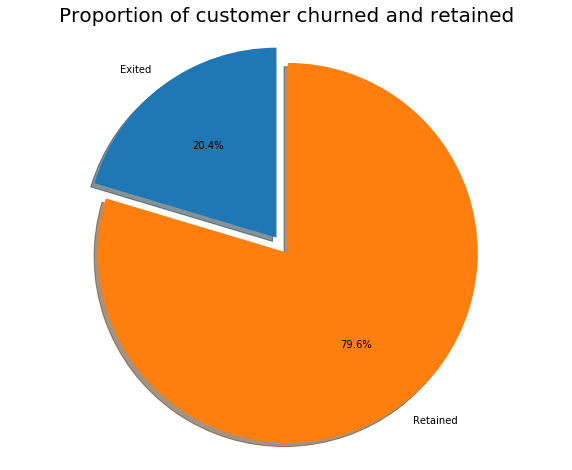

In [4]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

[Text(0, 0.5, 'Exiting count'), Text(0.5, 0, 'Geography')]

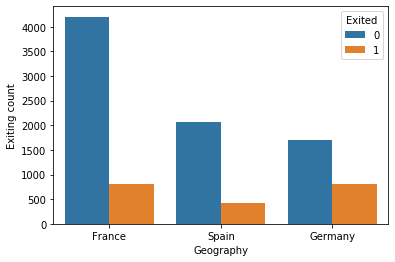

In [5]:
ax=sns.countplot(data=df,x='Geography',hue='Exited')
ax.set(xlabel='Geography',ylabel='Exiting count')

### We can see that the customers from Germany tend to churn more even though the population is comparatively lesser.

[Text(0, 0.5, 'Exiting count'), Text(0.5, 0, 'Gender')]

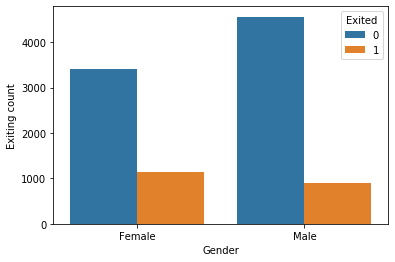

In [6]:
ax=sns.countplot(data=df,x='Gender',hue='Exited')
ax.set(xlabel='Gender',ylabel='Exiting count')

## Based on Gender

In [7]:
count_female,total_female,count_male,total_male=0,0,0,0
for i in df.index:
    if(df['Gender'][i]=='Female'):
        total_female+=1
        if(df['Exited'][i]==1):
            count_female+=1
    else:
        total_male+=1
        if(df['Exited'][i]==1):
            count_male+=1
print("Percentage of Females exited:",np.floor((count_female/total_female)*100))
print("Percentage of Males exited:",np.floor((count_male/total_male)*100))

Percentage of Females exited: 25.0
Percentage of Males exited: 16.0


## Based on Age

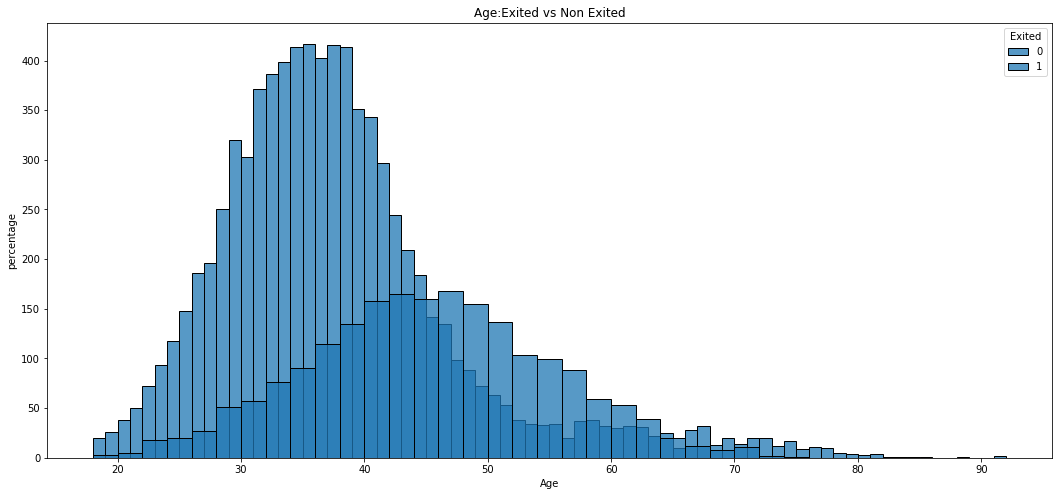

In [8]:
Non_Exited = df[df['Exited']==0]
Exited = df[df['Exited']==1]
plt.subplots(figsize=(18,8))
sns.histplot(Non_Exited['Age'])
sns.histplot(Exited['Age'])
plt.title('Age:Exited vs Non Exited')
plt.legend([0,1],title='Exited',)
plt.ylabel('percentage');

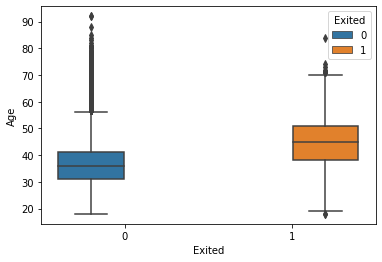

In [9]:
 sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df)

### We can see that people whose age is greater than 40 tend to churn more.

## Based on Credit Score

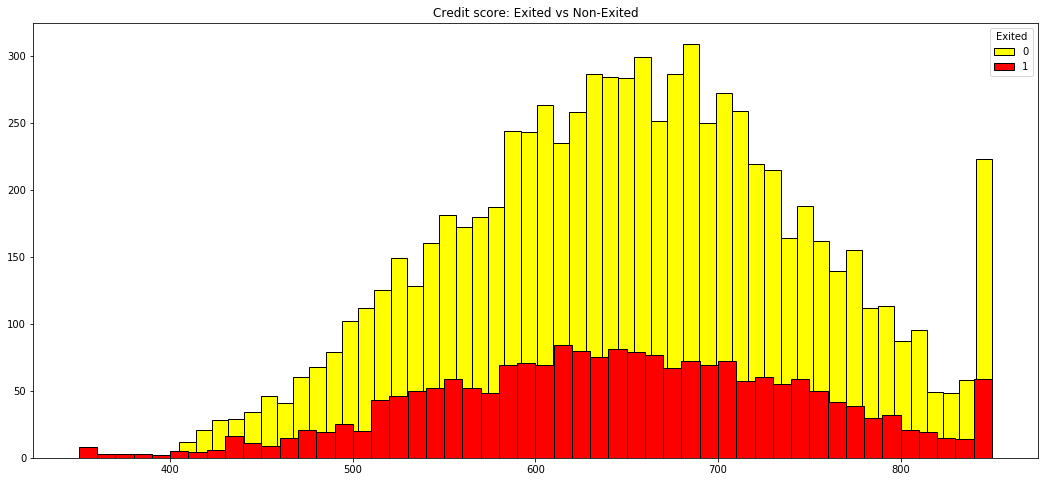

In [10]:
plt.figure(figsize=(18,8))
plt.hist(x='CreditScore',bins=50,data=Non_Exited,edgecolor='black',color='yellow')
plt.hist(x='CreditScore',bins=50,data=Exited,edgecolor='black',color='red')
plt.title('Credit score: Exited vs Non-Exited')
plt.legend([0,1],title='Exited');

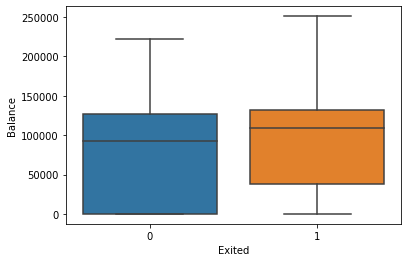

In [11]:
sns.boxplot(x=df['Exited'], y=df['Balance'])

## Active member or not

[Text(0, 0.5, 'Exiting count'), Text(0.5, 0, 'Active member')]

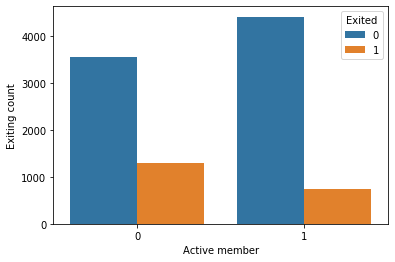

In [12]:
ax=sns.countplot(data=df,x='IsActiveMember',hue='Exited')
ax.set(xlabel='Active member',ylabel='Exiting count') 

### This is pretty obvious that active members prefer to stay in the bank more than inactive members.

## Based on Salary

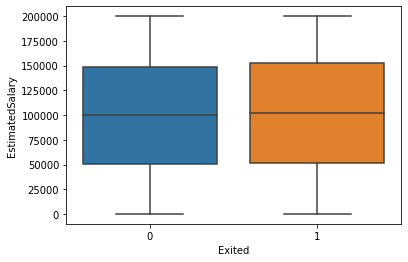

In [13]:
sns.boxplot(x=df['Exited'], y=df['EstimatedSalary'])

#### We couldn't infer much from salary.Hence,we have to find other methods.

## Credit card user or not?

In [ ]:
ax=sns.countplot(data=df,x='HasCrCard',hue='Exited')
ax.set_title('Has credit card')
ax.set_ylabel('Exited');

### Interestingly, the majority of the customers that churned are those with credit cards.

## Feature engineering

#### Splitting into train and test sets

In [3]:
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1, 5)

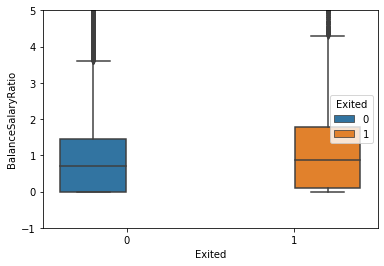

In [4]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

### As we couldn't infer much from balance and salary,now we could see that the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more 


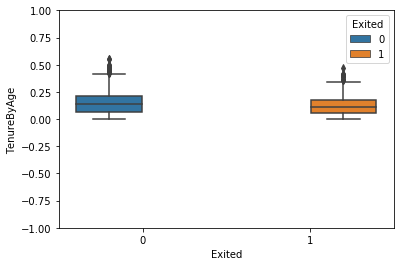

In [6]:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [9]:
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [8]:
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [9]:
df_train.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [11]:
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,461,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000,1,-1,-1,1,-1
6332,619,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714,-1,1,-1,1,-1
8895,699,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000,-1,1,-1,1,-1
5351,558,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756,-1,-1,1,-1,1
4314,638,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706,-1,1,-1,-1,1


In [12]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'CreditScoreGivenAge']

In [13]:
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0.222,0.094595,0.6,0.000000,0.333333,1,1,0.076118,0,0.000000,0.240000,0.323157,1,-1,-1,1,-1
6332,0.538,0.229730,0.4,0.360358,0.000000,1,1,0.102376,0,0.003317,0.114286,0.305211,-1,1,-1,1,-1
8895,0.698,0.297297,0.8,0.486406,0.000000,1,0,0.510225,0,0.000901,0.200000,0.300198,-1,1,-1,1,-1
5351,0.416,0.310811,0.2,0.495130,0.000000,1,1,0.555744,0,0.000843,0.048780,0.208238,-1,-1,1,-1,1
4314,0.576,0.216216,0.5,0.532094,0.000000,0,1,0.778145,0,0.000647,0.147059,0.330882,-1,1,-1,-1,1


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [15]:
x=df_train.drop('Exited',axis=1)
y=df_train['Exited']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5600, 16)
(2400, 16)
(5600,)
(2400,)


In [ ]:
## Model fitting

In [29]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Basic Random forest classifier report")
print(classification_report(y_test, y_pred))

Basic Random forest classifier report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1896
           1       0.80      0.46      0.58       504

    accuracy                           0.86      2400
   macro avg       0.83      0.71      0.75      2400
weighted avg       0.86      0.86      0.85      2400



### We can see that precision  scores on 1's in random forest classifier are 80%which is pretty good.Let's try some other models

In [34]:
##Logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("LogisticRegression classification report")
print(classification_report(y_test, y_pred_log))

LogisticRegression classification report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1896
           1       0.65      0.21      0.32       504

    accuracy                           0.81      2400
   macro avg       0.73      0.59      0.61      2400
weighted avg       0.79      0.81      0.77      2400



D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Compared to random forest the precision score in logistic regresssion model is much lesser

In [33]:
#K Nearest neighbours
knn =KNeighborsClassifier(n_neighbors=50)
knn_model = knn.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification report")
print(classification_report(y_test, y_pred_knn))

KNN Classification report
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1896
           1       0.67      0.06      0.11       504

    accuracy                           0.80      2400
   macro avg       0.73      0.53      0.50      2400
weighted avg       0.77      0.80      0.72      2400



####  KNN performs better than logistic regression but not as good as random forest,let's try hyperparameter tuning to see if can improve the scores

## Hyperparameter tuning

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanForest_tuned = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanForest_tuned.fit(X_train,y_train)
print(RanForest_tuned.best_score_)    
print(RanForest_tuned.best_params_)

0.8614285714285714
{'max_depth': 8, 'max_features': 8, 'min_samples_split': 6, 'n_estimators': 50}


In [37]:
ran_best=RandomForestClassifier(max_depth=8, max_features= 8, min_samples_split=6, n_estimators=50)
ran_best.fit(X_train,y_train)
ran_best_pred=ran_best.predict(X_test)
print("Tuned Random forest classifier report")
print(classification_report(y_test, ran_best_pred))

Tuned Random forest classifier report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1896
           1       0.79      0.47      0.59       504

    accuracy                           0.86      2400
   macro avg       0.83      0.72      0.75      2400
weighted avg       0.86      0.86      0.85      2400



In [39]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
log_tuned = GridSearchCV(LogisticRegression(), param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
log_tuned.fit(X_train,y_train)
print(log_tuned.best_score_)    
print(log_tuned.best_params_)

0.8167857142857143
{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [40]:
log_best=LogisticRegression(C=100,penalty='l2',solver='newton-cg')
log_best.fit(X_train,y_train)
pred_log_best=log_best.predict(X_test)
print("Tuned Logistic regression classification report")
print(classification_report(y_test, pred_log_best))

Tuned Logistic regression classification report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1896
           1       0.66      0.23      0.34       504

    accuracy                           0.81      2400
   macro avg       0.74      0.60      0.62      2400
weighted avg       0.79      0.81      0.78      2400



### From the above tuned models, the best model that gives a decent balance of the recall and precision is the random forest with a precision score on 1's of 0.80, out of all customers that the model thinks will churn, 80% actually churn and the overall accuracy is 86 which is good

## Feature importance

In [49]:
feature_importances = pd.DataFrame(ran_best.feature_importances_, index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Age,0.298185
NumOfProducts,0.214434
IsActiveMember,0.098298
CreditScoreGivenAge,0.083900
Balance,0.066023
BalanceSalaryRatio,0.049983
CreditScore,0.043879
EstimatedSalary,0.038809
Geography_Germany,0.035101
TenureByAge,0.029447


## Test data

In [53]:
df_test.shape

(2000, 17)

In [51]:
df_test['BalanceSalaryRatio'] = df_test.Balance/df_test.EstimatedSalary
df_test['TenureByAge'] = df_test.Tenure/(df_test.Age)
df_test['CreditScoreGivenAge'] = df_test.CreditScore/(df_test.Age)
df_test.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_test[i].dtype == np.str or df_test[i].dtype == np.object):
        for j in df_test[i].unique():
            df_test[i+'_'+j] = np.where(df_test[i] == j,1,-1)
        remove.append(i)
df_test = df_test.drop(remove, axis=1)
minVec = df_test[continuous_vars].min().copy()
maxVec = df_test[continuous_vars].max().copy()
df_test[continuous_vars] = (df_test[continuous_vars]-minVec)/(maxVec-minVec)
df_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
2,0.270440,0.324324,0.8,0.750363,0.666667,1,0,0.570039,1,0.000132,0.190476,0.135061,1,-1,-1,1,-1
3,0.683438,0.283784,0.1,0.000000,0.333333,0,0,0.469437,0,0.000000,0.025641,0.292387,1,-1,-1,1,-1
5,0.570231,0.351351,0.8,0.534621,0.333333,1,0,0.749303,1,0.000072,0.181818,0.206382,-1,1,-1,-1,1
17,0.368973,0.081081,0.9,0.000000,0.333333,1,1,0.072030,0,0.000000,0.375000,0.422869,-1,1,-1,1,-1
18,0.448637,0.364865,0.6,0.000000,0.000000,0,0,0.793978,0,0.000000,0.133333,0.163837,-1,1,-1,-1,1


In [55]:
print(classification_report(df_test.Exited,ran_best.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1610
           1       0.69      0.47      0.56       390

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



## Hence,We could achieve a accuracy score of 85 in the unseen test data

In [57]:
#dumping to a pickle file for deployment
import pickle
file = open('Customer_Churn_aravind_final.pkl', 'wb')
pickle.dump(ran_best, file)